<!-- dom:TITLE: Theoretisch-Physikalisches Seminar -->
# Nichtlineare Dynamik und Strukturbildung
<!-- dom:AUTHOR: Philipp Hoevel, Saarland University -->
<!-- Author: --> **Philipp Hövel**, Saarland University

Date: **June 12, 2024**

### Tasks

  * logistic map
  * Henon map
  * Delay embedding

### Importing helpful Python modules

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import pylab as pl
from math import *

### logistic map
$$
  x_n = r x (1-x)
$$
with $r\in[0,4]$.

In [2]:
def f(x, r):
    """die Abbildung"""
    return r * x * (1.0 - x)

def df(x, r):
    """die Ableitung der Abbildung"""
    return r * (1.0 - 2*x)

def iterate(x0, n, r):
    """Mach n Iterationen"""
    for i in range(n):
        x0 = f(x0, r)
    return x0

def iterateArray(x0, n, r):
    """Mach n Iterationen und gib das Ergebnis als array zurueck"""
    li = []
    for i in range(n):
        x0 = f(x0, r)
        li.append(x0)
    return np.array(li)

def lyapunov(x0, n, r):
    """Mach n Iterationen und gib den gemittelten Ljapunov-Exponenten zurueck"""
    lyapunov = 0
    for i in range(n):
        x0 = f(x0, r)
        # Exponenten aufsummieren
        lyapunov += log(abs(df(x0,r)))
    # Und mitteln
    lyapunov /= n
    return lyapunov

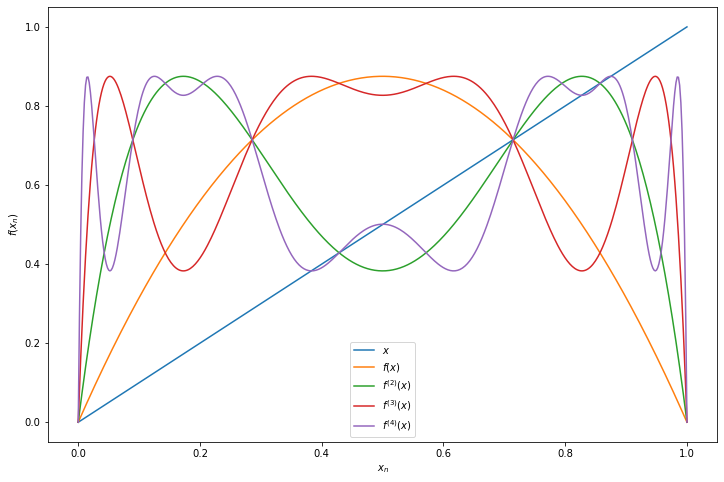

In [3]:
x = np.linspace(0,1,500)

#r = 0.5
#r = 1.0
#r = 2.5
r = 3.5

fx = f(x, r)
f2x = f(fx,r)
f3x = f(f2x,r)
f4x = f(f3x,r)

plt.figure(figsize=(12, 8))

pl.xlabel(r'$x_n$')
pl.ylabel(r'$f(x_n)$')
pl.plot(x,x, label=r'$x$')
pl.plot(x,fx, label=r'$f(x)$')

pl.plot(x,f2x, label=r'$f^{(2)}(x)$')
pl.plot(x,f3x, label=r'$f^{(3)}(x)$')
pl.plot(x,f4x, label=r'$f^{(4)}(x)$')

pl.legend()
pl.show()

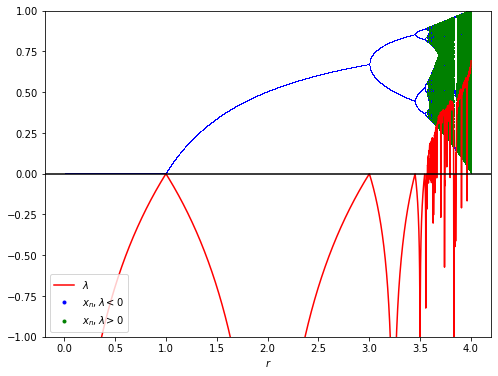

In [4]:
# array der Ljapunovexponenten fuer spaeteren Linienplot
lyapunovs = []

# r-Intervall des Bifurkationsdiagramms
r_intervall = np.linspace(0.01, 4, 5000)

fig = plt.figure(figsize=(8, 6))

for r in r_intervall:
    # Transiente laufen lassen
    x0 = iterate(0.123456789, 400, r)
    
    # Bifurkationsdiagramm erstellen
    xs = iterateArray(x0, 300, r)
    
    # Lyapunov-Exponenten berechnen und speichern
    l = lyapunov(x0, 2000, r)
    
    #lyapunovs.append(l*0.2);
    lyapunovs.append(l);
    
    # Plot abhaengig vom Vorzeichen des Lyapunovexponenten einfaerben
    if ( l < 0 ):
        bif = pl.plot(np.ones(len(xs)) * r, xs, 'b,')
    else:
        bif2 = pl.plot(np.ones(len(xs)) * r, xs, 'g,')

lyap = pl.plot(r_intervall, lyapunovs, 'r-', label=r'$\lambda$')

# Fuer Legende dickere Punkte benutzen
bif = pl.plot([],[], 'b.', label=r'$x_n, \lambda < 0$')
bif2 = pl.plot([],[], 'g.', label=r'$x_n, \lambda > 0$')

pl.axhline(color='k', ls='solid')

pl.xlabel(r'$r$')
pl.ylabel('')
pl.ylim(-1, 1)
#pl.subplots_adjust( left=0.05, bottom=0.075, right=0.95, top=0.95 )
pl.legend(loc='lower left')
#pl.show() 
pl.savefig('log_map.png', dpi=500) 

### Henon map
$$
  x_{n+1} = a - x_n^2 + b y_n\\
  y_{n+1} = x_n  
$$
with typical paramters $a=1.4$ (or $a=1.29$) and $b=0.3$.

In [5]:
def f_Henon(X, a, b):
    """the Henon map"""
    x,y = X
    return [1 - a * x**2 + b * y, x ]

def iterate(x0, n, a, b):
    """do n iterations"""
    for i in range(n):
        x0 = f_Henon(x0, a, b)
    return x0

def iterateArray(x0, n, a, b):
    """Do n Iterations and an array"""
    li = []
    for i in range(n):
        x0 = f_Henon(x0, a, b)
        li.append(x0)
    return np.array(li)

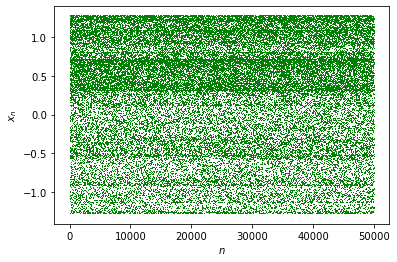

In [14]:
#a = 1.29
a = 1.4
b = 0.3

# initial condition
X = [0.35,0.75]
# run 100 steps as transient
X = iterate( X, 100, a, b)

# Run time series
N = 50 # steps
N = 500 # steps
N = 5000 # steps
N = 50000 # steps
XS = iterateArray( X, N, a, b)

pl.plot(np.linspace(0,len(XS),len(XS)), XS.T[0], 'g,')
pl.xlabel(r'$n$')
pl.ylabel(r'$x_n$')
pl.show()

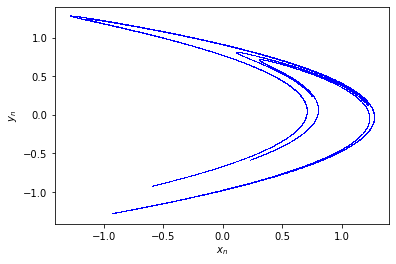

In [16]:
pl.plot(XS.T[0], XS.T[1], 'b,')
pl.xlabel(r'$x_n$')
pl.ylabel(r'$y_n$')
pl.show()

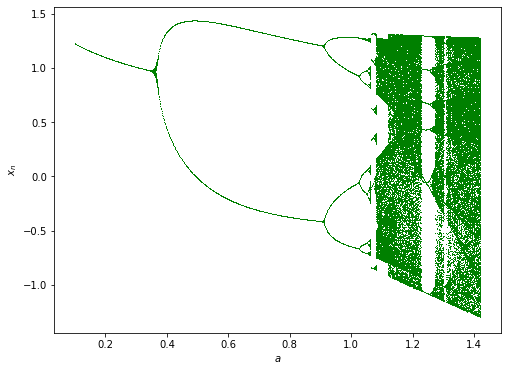

In [17]:
# a-interval of the bifurcation diagram
a_intervall = np.linspace(0.1, 1.42, 1000)

fig = plt.figure(figsize=(8, 6))

X = [0.35,0.75]

for a in a_intervall:
    # Transiente laufen lassen
    X0 = iterate( X, 200, a, b)
#    X0 = iterate( X, 100, a, b)
    
    # Bifurkationsdiagramm erstellen
    XS = iterateArray(X0, 300, a, b)
    
    pl.plot(np.ones(len(XS)) * a, XS.T[0], 'g,')

pl.xlabel(r'$a$')
pl.ylabel(r'$x_n$')
pl.show()

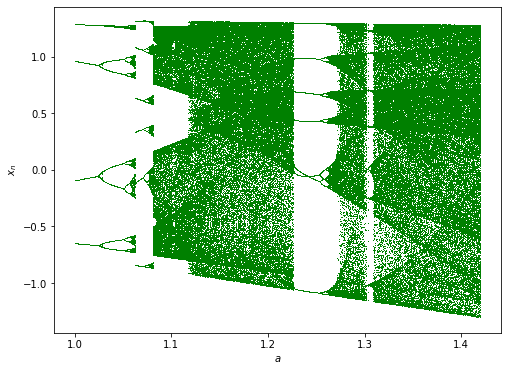

In [18]:
# a-interval of the bifurcation diagram
a_intervall = np.linspace(1, 1.42, 1000)

fig = plt.figure(figsize=(8, 6))

X = [0.35,0.75]

for a in a_intervall:
    # Transiente laufen lassen
    X0 = iterate( X, 200, a, b)
    
    # Bifurkationsdiagramm erstellen
    XS = iterateArray(X0, 300, a, b)
    
    pl.plot(np.ones(len(XS)) * a, XS.T[0], 'g,')

pl.xlabel(r'$a$')
pl.ylabel(r'$x_n$')
pl.show()

### Rössler model
$$
  \dot{x} = -y - z\\
  \dot{y} = x + ay \\
  \dot{z} = b - xz - cz
$$
with typical parameters for chaos $a=0.2$, $b=0.2$, and $c=5.7$.

In [19]:
# Roessler
def F(X, t, a, b, c):
    x, y, z = X
    return [-y - z,
            x + a*y,
            b + x*z - c*z]

In [20]:
tmax = 100
t = np.linspace(0, tmax, tmax*200)

x0 = 1.
y0 = 1.
z0 = 1.
a = 0.2
b = 0.2
c = 5.7

erg, info = odeint(F, (x0, y0, z0), t, args=(a, b, c), full_output=True)
x, y, z = erg.transpose()

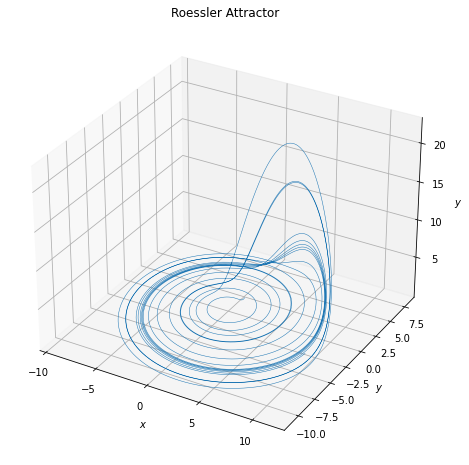

In [21]:
ax = plt.figure(figsize=(12, 8)).add_subplot(projection='3d')

ax.plot(x,y,z, lw=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$y$')
ax.set_title("Roessler Attractor")

plt.show()

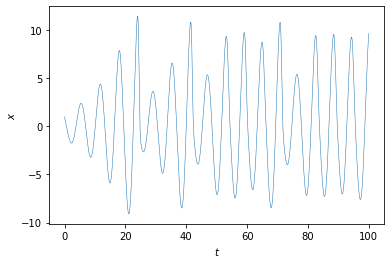

In [23]:
plt.plot(t,x, lw=0.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.show()

In [24]:
print(x)
print(len(x))

[1.         0.99004039 0.98016114 ... 9.62061934 9.63462348 9.64832142]
20000


#### Delay embedding

In [25]:
def takens(data, m=3, d=100):
    emb = np.array([data[0:len(data) - d*m]])
    for i in range(1, m):
        emb = np.append(emb, [data[i*d:len(data) - d*(m - i)]], axis=0)
        
    return emb

In [30]:
x_emb = takens(x, d = 2)
print(x_emb)

[[1.         0.99004039 0.98016114 ... 9.53029957 9.54609046 9.5615894 ]
 [0.98016114 0.97036013 0.96063531 ... 9.5615894  9.5767941  9.59170224]
 [0.96063531 0.95098462 0.94140607 ... 9.59170224 9.60631145 9.62061934]]


In [27]:
x_emb[0]

array([1.        , 0.99004039, 0.98016114, ..., 9.5767941 , 9.59170224,
       9.60631145])

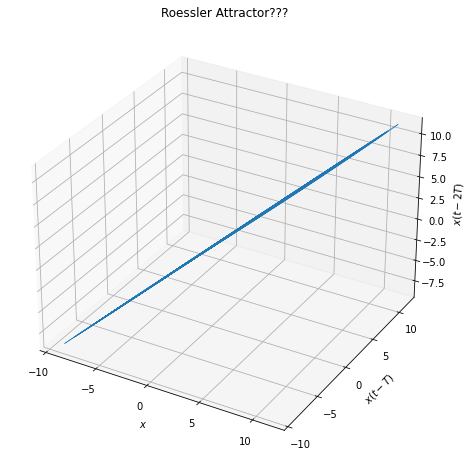

In [28]:
ax = plt.figure(figsize=(12, 8)).add_subplot(projection='3d')

ax.plot(x_emb[0],x_emb[1],x_emb[2], lw=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$x(t-T)$')
ax.set_zlabel(r'$x(t-2T)$')
ax.set_title("Roessler Attractor???")

plt.show()

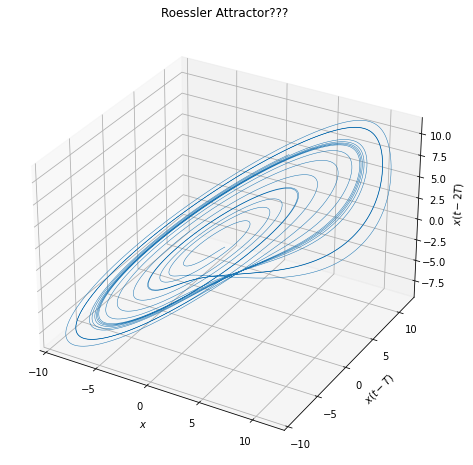

In [33]:
x_emb = takens(x, d =60)
ax = plt.figure(figsize=(12, 8)).add_subplot(projection='3d')

ax.plot(x_emb[0],x_emb[1],x_emb[2], lw=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$x(t-T)$')
ax.set_zlabel(r'$x(t-2T)$')
ax.set_title("Roessler Attractor???")

plt.show()